In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2023.03.1


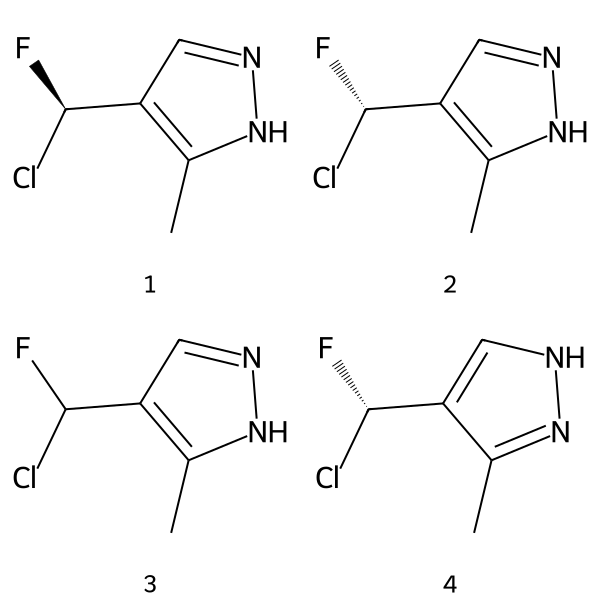

In [2]:
smis = ["Cc1[nH]ncc1[C@H](F)Cl","Cc1[nH]ncc1[C@@H](F)Cl","Cc1[nH]ncc1[CH](F)Cl","Cc1n[nH]cc1[C@@H](F)Cl"]
ms = [Chem.MolFromSmiles(smi) for smi in smis]
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.legendFontSize=24
Draw.MolsToGridImage(ms,legends=[str(i+1) for i in range(len(ms))],molsPerRow=2,subImgSize=(300,300))

In [3]:
import lwreg

# set the name of the database we'll work with:
config = lwreg.utils.defaultConfig()
config['dbname'] = 'jupyter_demo.sqlt'

Initialize the database. **Note** that this erases everything in the current database, so be very careful with this command!

In [4]:
lwreg.initdb(config=config,confirm='yes')

True

Register all of our compounds at once:

In [5]:
# The RDKit standardizer is quite verbose by default, make it be quiet:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')

In [6]:
lwreg.bulk_register(mols=ms,config=config)

(1, 2, 3, 4)

Do some queries:

In [7]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl',config=config)

[1]

Query using just the `no_stereo_smiles` layer. This pays attention to tautomers but ignores stereochemistry:

In [8]:
lwreg.query(smiles='Cc1[nH]ncc1[C@H](F)Cl',layers='no_stereo_smiles',config=config)

[1, 2, 3]

Retrieve the structures of the molecules corresponding to that query:

In [9]:
lwreg.retrieve(ids=[1,2,3],config=config)

((1,
  '\n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 9 9 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 2.775976 0.000000 0.000000 0\nM  V30 2 C 1.275976 0.000000 0.000000 0\nM  V30 3 N 0.394298 1.213525 0.000000 0\nM  V30 4 N -1.032286 0.750000 0.000000 0\nM  V30 5 C -1.032286 -0.750000 0.000000 0\nM  V30 6 C 0.394298 -1.213525 0.000000 0\nM  V30 7 C 0.857824 -2.640110 0.000000 0\nM  V30 8 F -0.145872 -3.754828 0.000000 0\nM  V30 9 Cl 2.325045 -2.951978 0.000000 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 1 1 2\nM  V30 2 1 2 3\nM  V30 3 1 3 4\nM  V30 4 2 4 5\nM  V30 5 1 5 6\nM  V30 6 1 6 7\nM  V30 7 1 7 8 CFG=1\nM  V30 8 1 7 9\nM  V30 9 2 6 2\nM  V30 END BOND\nM  V30 END CTAB\nM  END\n',
  'mol'),
 (2,
  '\n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 9 9 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 C 2.775976 0.000000 0.000000 0\nM  V30 2 C 1.275976 0.000000 0.000000 0\nM  V30 3 N 0.394298

Register a bunch more molecules, these are molecules from ChEMBL:

In [10]:
import csv
with open('./demo_data/S1P1_data.csv','r') as inf:
    rdr = csv.reader(inf)
    smis = [x[8] for x in rdr]
    smis.pop(0)
mols = [Chem.MolFromSmiles(x) for x in smis[:100]]

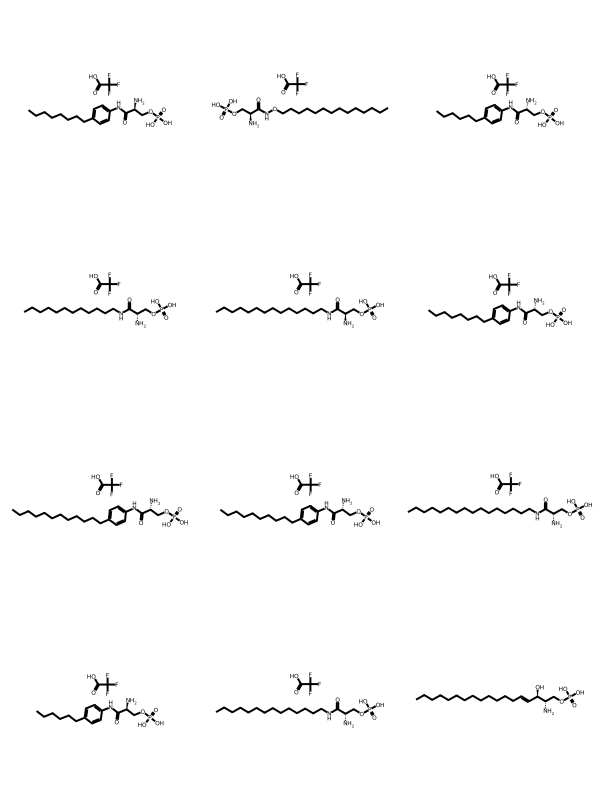

In [11]:
Draw.MolsToGridImage(mols[:12],molsPerRow=3)

In [12]:
new_ids = lwreg.bulk_register(mols=mols,config=config)


In [13]:
len(new_ids)

100

We end up with `None` in the new_id list for molecules which are duplicates:

In [15]:
new_ids.count(None)

4

In [18]:
regno,molb,fmt = lwreg.retrieve(ids=[43],config=config)[0]

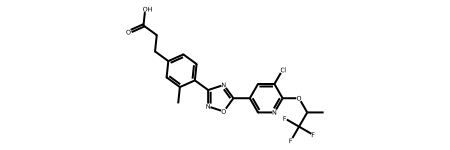

In [19]:
Chem.MolFromMolBlock(molb)